## Naive Bayes Classifier

In this work, a Naive Bayes classifier is implemented, with the algorithm written manually. It is also necessary to implement this classifier using the sklearn library and then compare the results.

The data vector consists of the data from datasets.load_breast_cancer().



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sci_opt
from math import sqrt, exp, pi
from scipy.stats import norm
from matplotlib.colors import ListedColormap
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from sklearn.model_selection import train_test_split

Loading the dataset and splitting it into train and test sets.

In [ ]:
from sklearn import datasets
data = datasets.load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(data['data'], data['target'],  random_state = 42, test_size = 0.2)

Calculation of the mean values and standard deviations within each class in the training set

In [ ]:
mean_0 = np.mean(x_train[y_train == 0],axis=0)
mean_1= np.mean(x_train[y_train == 1],axis=0)

std_0= np.std(x_train[y_train == 0],axis=0)
std_1 = np.std(x_train[y_train == 1],axis=0)

print('mean values 0 class: ', mean_0)
print('mean values 1 class: ' ,mean_1)
print('std values 0 class: ', std_0)
print('std values 1 class: ', std_1)

mean values 0 class:  [1.74169231e+01 2.14923077e+01 1.15012959e+02 9.75013609e+02
 1.02531124e-01 1.43885148e-01 1.59455266e-01 8.67635503e-02
 1.93533136e-01 6.26227219e-02 6.00757988e-01 1.20041598e+00
 4.28259763e+00 7.18094675e+01 6.75819527e-03 3.17857870e-02
 4.18483432e-02 1.50038935e-02 2.06236627e-02 3.97157988e-03
 2.10274556e+01 2.92200592e+01 1.40713964e+02 1.41022781e+03
 1.44440769e-01 3.71363373e-01 4.51448994e-01 1.81149467e-01
 3.26636095e-01 9.11269822e-02]
mean values 1 class:  [1.21680559e+01 1.78216434e+01 7.82140909e+01 4.64910839e+02
 9.17334615e-02 7.98258741e-02 4.72053007e-02 2.55395140e-02
 1.73751049e-01 6.28359790e-02 2.84577273e-01 1.20402867e+00
 2.01659545e+00 2.13169266e+01 7.12550350e-03 2.20011573e-02
 2.74909122e-02 1.00562413e-02 2.05438776e-02 3.73115490e-03
 1.34032587e+01 2.33585664e+01 8.72421678e+01 5.61890210e+02
 1.23904301e-01 1.82647238e-01 1.70089682e-01 7.46106678e-02
 2.69150350e-01 7.95783566e-02]
std values 0 class:  [3.27760249e+00 3

Calculation of prior probabilities for each class using the formula

In [ ]:
p0 = x_train[y_train == 0].shape[0]/x_train.shape[0]
p1 = x_train[y_train == 1].shape[0]/x_train.shape[0]
print('p(w): ', p0 ,p1 )

p(w):  0.37142857142857144 0.6285714285714286


Calculation of discriminant functions for each class and posterior probability. The class selection is based on the values of the posterior probabilities for each class. The sample is assigned to the class with the highest probability.

In [ ]:
def g_0(x):
    f = 1
    n = 0
    for i in range (0,29):
        f = f * (1/(((2*np.pi)**((i+1)/2))*std_0[i]))
        n = n + (-(x[i] - mean_0[i])**2/(2*std_0[i]**2))
    g = np.log(f) + n
    return g

def g_1(x):
    f = 1
    n = 0
    for i in range (0,29):
        f = f * (1/(((2*np.pi)**((i+1)/2))*std_1[i]))
        n = n + (-(x[i] - mean_1[i])**2/(2*std_1[i]**2))
    g = np.log(f) + n
    return g

pw0 = np.log(p0) + g_0(x_test[8])
pw1 = np.log(p1) + g_1(x_test[8])

print('pw1',(np.exp(pw0)),'pw2',(np.exp(pw1)))
print('class', np.argmax([(pw0), (pw1)]))

pw1 5.180086222153325e-163 pw2 1.2554555372900062e-164
class 0


In [ ]:
for i in range (0, 113):
    pw0 = np.log(p0) + g_0(x_test[i])
    pw1 = np.log(p1) + g_1(x_test[i])
    print('pw0',(np.exp(pw0)),'pw1',(np.exp(pw1)), 'class', np.argmax([(np.exp(pw0)), (np.exp(pw1))]))

pw0 2.5935015568176884e-164 pw1 1.539430397449639e-155 class 1
pw0 1.398582845444609e-162 pw1 3.208181692239148e-222 class 0
pw0 7.40897382184525e-161 pw1 2.5299909636142272e-172 class 0
pw0 5.929708408670245e-167 pw1 6.754158130103657e-156 class 1
pw0 4.676644161450302e-170 pw1 3.628614994297725e-156 class 1
pw0 3.605777636549255e-173 pw1 1.1378606070528753e-288 class 0
pw0 3.998651553271707e-165 pw1 2.8327973055718426e-305 class 0
pw0 1.2937840636954895e-161 pw1 6.437450335327747e-182 class 0
pw0 5.180086222153325e-163 pw1 1.2554555372900062e-164 class 0
pw0 1.706019554300129e-172 pw1 3.611057339283581e-158 class 1
pw0 4.150911985395625e-170 pw1 4.7721245418238e-157 class 1
pw0 1.9651608946681836e-161 pw1 5.267944420277194e-179 class 0
pw0 1.3984249932150314e-170 pw1 1.2702221092183147e-158 class 1
pw0 1.0923510662667662e-162 pw1 6.40577953593217e-175 class 0
pw0 1.4632001161762836e-171 pw1 1.757815264916339e-157 class 1
pw0 1.7329939444359084e-168 pw1 1.8621599753538985e-215 class 0

Performing classification using the built-in function in the library

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
GaussianNB()
print('Accuracy of the NB Classificator',clf.score(x_test, y_test))

Accuracy of the NB Classificator 0.9736842105263158


The difference between the manually written classifier and the one taken from the library

In [ ]:
c = [] # Array of classes that were performed by manually
for i in range (0, 113):
    pw0 = np.log(p0) + g_0(x_test[i])
    pw1 = np.log(p1) + g_1(x_test[i])
    clas= np.argmax([(np.exp(pw0)), (np.exp(pw1))])
    c.append(clas)

cc = []# Array of classes that were performed by function from the library
for i in range(0,113):
    c1 = clf.predict([x_test[i]])
    cc.append(c1)

k = 0 # Counter of the difference
for i in range(0,113):
    if ((cc[i]-c[i]) == 1):
        k = k +1
k

1

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax, cm

Confusion matrix of classifier taken from the library

Naive Bayes
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[40  3]
 [ 0 71]]


(<Axes: xlabel='Predicted label', ylabel='True label'>,
 array([[40,  3],
        [ 0, 71]]))

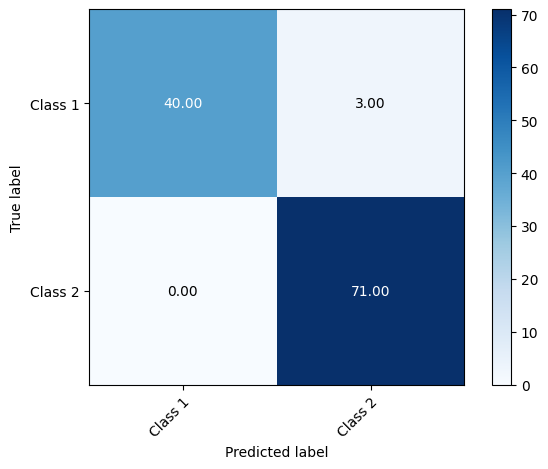

In [ ]:
clf = GaussianNB()
clf.fit(x_train, y_train)
expected = y_test
predicted = clf.predict(x_test)
print("Naive Bayes")
print(metrics.classification_report(expected, predicted))
plot_confusion_matrix(expected, predicted, classes=np.array(["Class 1", "Class 2"]))

Confusion matrix of the manually written classifier

Наивный Байес руками
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

[[40  3]
 [ 1 70]]


(<Axes: xlabel='Predicted label', ylabel='True label'>,
 array([[40,  3],
        [ 1, 70]]))

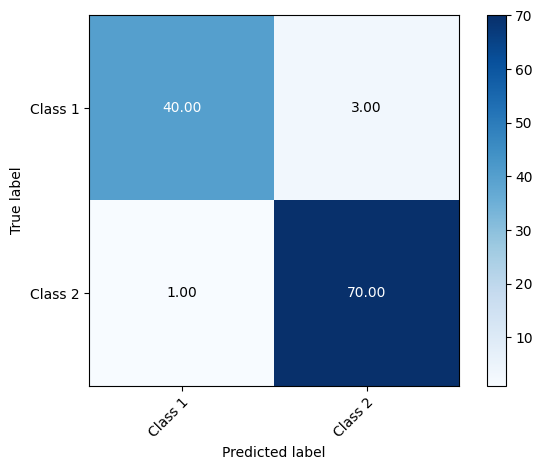

In [ ]:
expected = y_test
predicted = np.zeros(114)

for i in range (0, 113):
    pw0 = np.log(p0) + g_0(x_test[i])
    pw1 = np.log(p1) + g_1(x_test[i])

    if ((np.exp(pw0)) > np.exp(pw1)) :
        predicted [i] = 0

    if ((np.exp(pw0)) < np.exp(pw1)) :
        predicted [i] = 1



print("Наивный Байес руками")
print(metrics.classification_report(expected, predicted))
plot_confusion_matrix(expected, predicted, classes=np.array(["Class 1", "Class 2"]))